In [2]:
import matplotlib.pyplot as plt

def plot_action_cruve(file_name):
    file=open(file_name,"r")
    actions=[]
    for line in file.readlines():
        action=line.split(",")
        for a in action:
            actions.append(a)
    lst=[]
    for a in actions:
        b=a.strip('[').strip(']').split(" ")
        lst.append(b)
    
    action_values=[]
    for l in lst:
        for s in l:
            if (s!='0.' and s!=""):
                    if s!=']':
                        s=s.rstrip("]")
                        action_values.append(float(s))                  
    
    plt.plot(action_values)

In [3]:
def plot_rewards(file_name):
    f=open(file_name,"r")
    R=[]
    for l in f:
        for r in l.split(','):
            R.append(r)
    Rewards=[]
    for r in R:
        if r!='':
            Rewards.append(float(r))
    plt.plot(Rewards)

### 目前设定  

#### 奖励函数    
```
reward=-min(abs(self.target_z-pose.position.z),5)
        if timestamp > self.takeoff_limit:
            if pose.position.z < self.target_z:
                done=True
        if pose.position.z==self.target_z:
            reward+=100*(self.target_hit)**2+5
            self.target_hit+=1
        if pose.position.z > self.height_limit:
            reward-=500
            done=True
        if timestamp > self.max_duration:
            done=True
```

#### DDPG模型  
* Actor  
   * 优化器 Adam: lr=0.0001  
   * 网络结构 2 hidden-layers(400-300)
* Critic
   * 优化器 Adadelta(默认)
   * l2正则化(10-5)
   * 网络结构 state:（400-300）+ actions:300


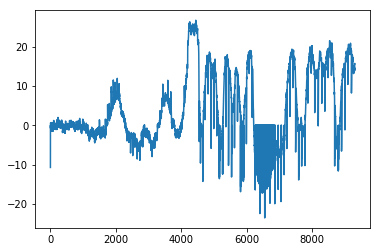

In [16]:
plot_action_cruve("actions_01.txt")

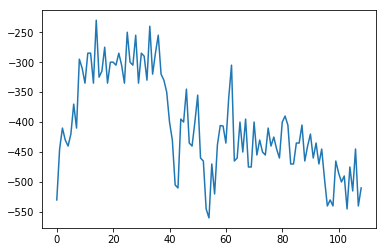

In [17]:
 plot_rewards("rewards_01.txt")

* 把Critic的网络结构改为 (400-300)

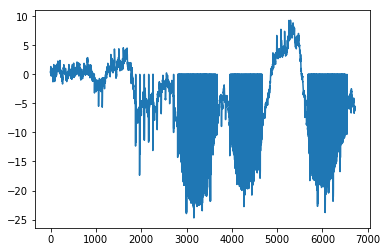

In [18]:
plot_action_cruve("actions_02.txt")

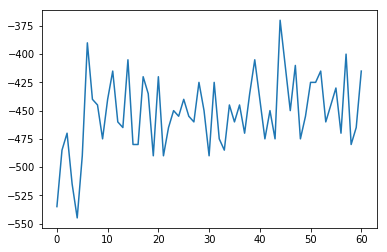

In [19]:
 plot_rewards("rewards_02.txt")

* Ctric网络结构还原
* 奖励函数微调
击中目标正奖励改为：增加第一次击中的奖励
```
if pose.position.z==self.target_z:
            reward+=100*(self.target_hit)**2+5
            self.target_hit+=1
```
飞离范围惩罚加大到-600

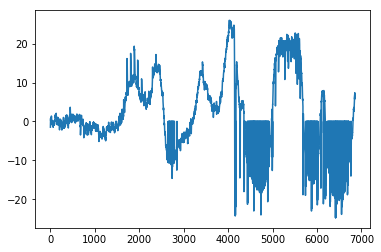

In [4]:
plot_action_cruve("actions_03.txt")

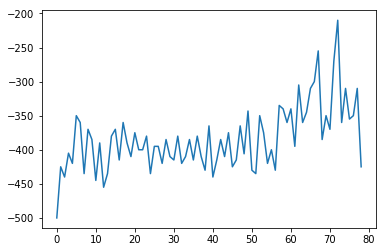

In [5]:
plot_rewards("rewards_03.txt")

#### 后期调整方向
* Memory内存容量扩大，取样数量调整
* Actor的激活函数
* Actor网络结构
* Actor加正则化


* Memory内存容量设为2000，取样量100

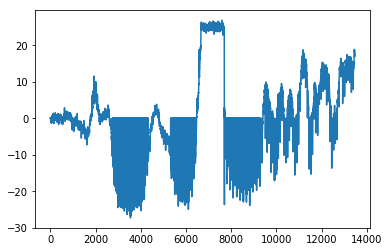

In [6]:
plot_action_cruve("actions_04.txt")

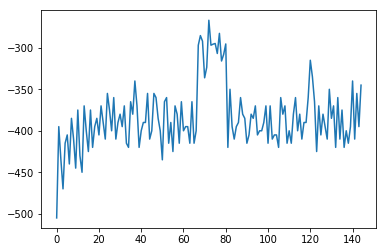

In [7]:
plot_rewards("rewards_04.txt")

* Memory容量改为1500
* Actor激活函数改成tanh

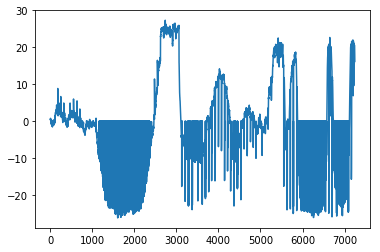

In [8]:
plot_action_cruve("actions_05.txt")

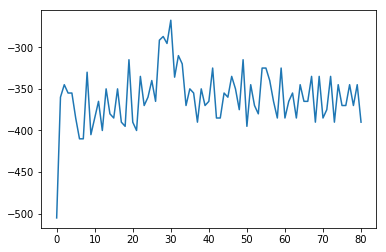

In [9]:
plot_rewards("rewards_05.txt")